# Clustering Exercises: Modeling
<hr style="border:2px solid black">

## Imports:

In [496]:
##### Imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import wrangle_mall as m

from sklearn.cluster import KMeans

from pydataset import data

<hr style="border:2px solid black">

## 1. Clustering with the Iris Dataset

In [497]:
# acquire
df = data('iris')

In [498]:
# rename columns
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

<Axes: xlabel='sepal_length', ylabel='petal_width'>

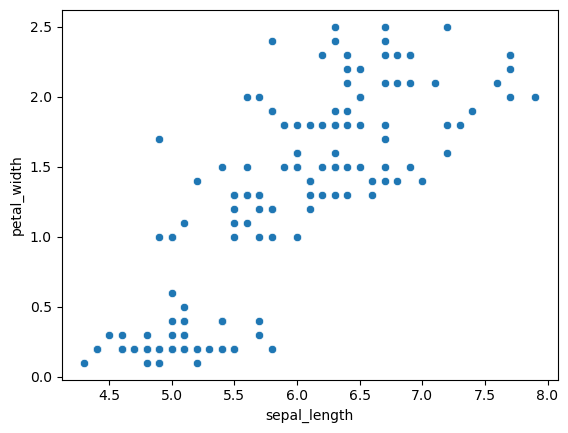

In [499]:
sns.scatterplot(x='sepal_length', y='petal_width', data = df)

In [500]:
# create feature space
X = df[['sepal_length', 'petal_width']]
X2 = df[['sepal_length', 'petal_width', 'sepal_width']]

#### Use elbow method to choose k

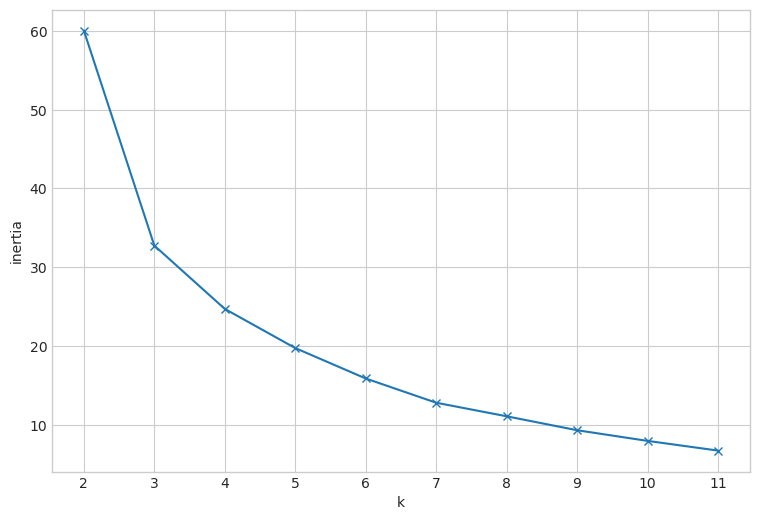

In [501]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')

> It looks like k=3 will give us the best results.

In [502]:
# create kmeans object
kmeans =KMeans(n_clusters=3)

# fit 
kmeans.fit(X)

# predict
clusters = kmeans.predict(X)

# add predictions to df
df['cluster_kmeans_model1'] = clusters

[Text(0.5, 1.0, 'K-Means Clusters')]

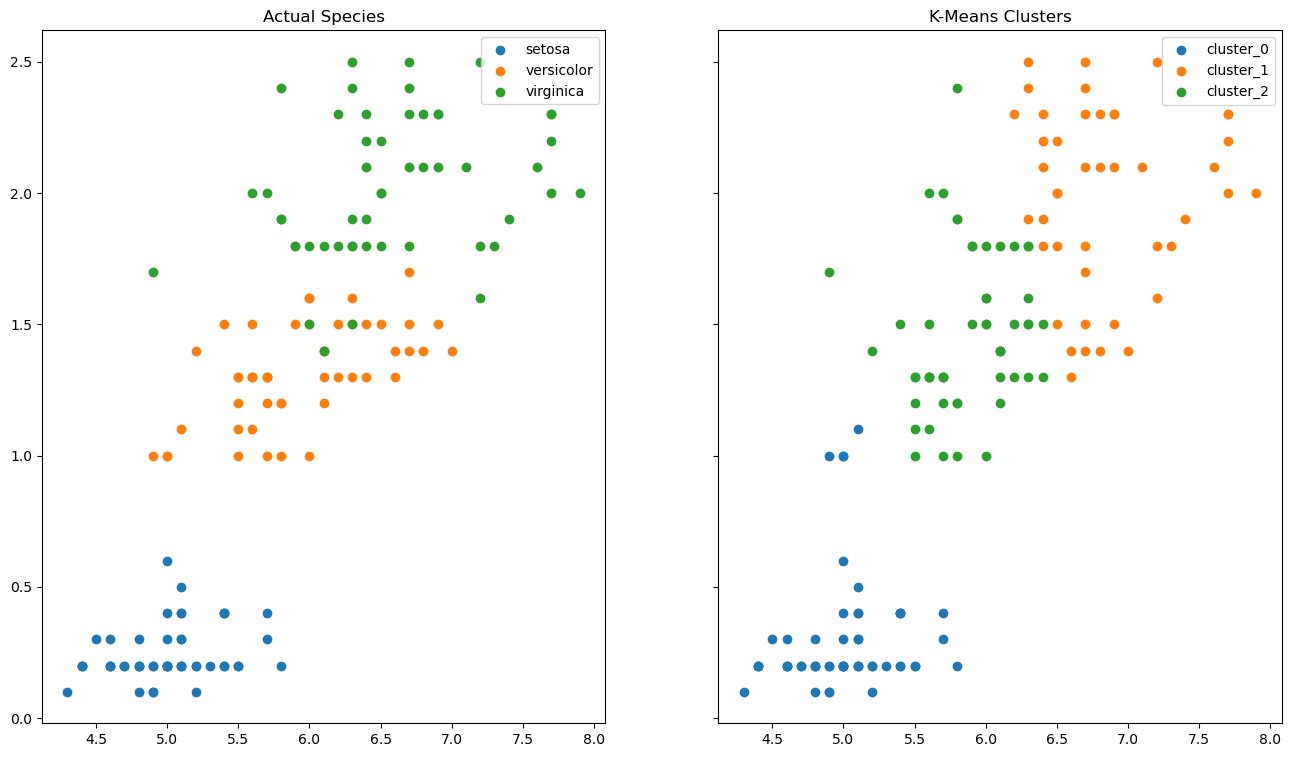

In [503]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster_kmeans_model1.sort_values().unique():
    axs[1].scatter(df[df.cluster_kmeans_model1 == cluster_n].sepal_length, df[df.cluster_kmeans_model1 == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### Repeat with 3 features:

#### Use elbow method to choose k

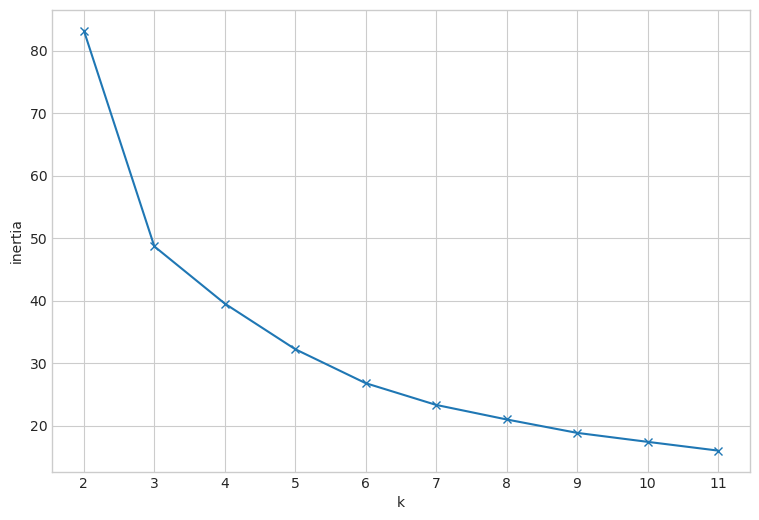

In [504]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')

> k=3 still looks to be our best

In [505]:
# create kmeans object for model2
kmeans_2 = KMeans(n_clusters=3)

# fit
kmeans_2.fit(X2)

# predict
clusters_m2 = kmeans_2.predict(X2)

# add predictions to df
df['cluster_kmeans_model2'] = clusters_m2

In [506]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_kmeans_model1,cluster_kmeans_model2
1,5.1,3.5,1.4,0.2,setosa,0,0
2,4.9,3.0,1.4,0.2,setosa,0,0
3,4.7,3.2,1.3,0.2,setosa,0,0
4,4.6,3.1,1.5,0.2,setosa,0,0
5,5.0,3.6,1.4,0.2,setosa,0,0
6,5.4,3.9,1.7,0.4,setosa,0,0
7,4.6,3.4,1.4,0.3,setosa,0,0
8,5.0,3.4,1.5,0.2,setosa,0,0
9,4.4,2.9,1.4,0.2,setosa,0,0
10,4.9,3.1,1.5,0.1,setosa,0,0


## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [507]:
mall_df_original = m.acquire_mall()
mall_df = mall_df_original.copy()
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='age', ylabel='spending_score'>

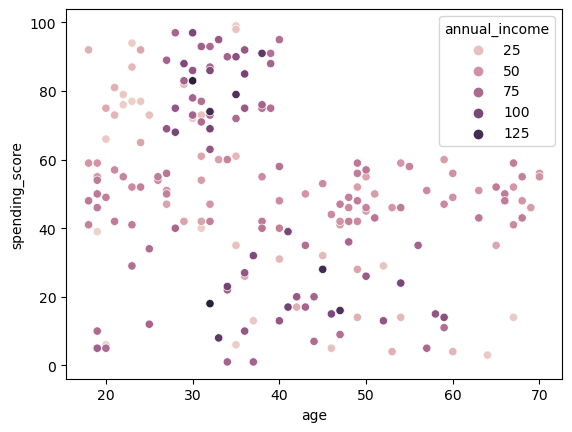

In [508]:
sns.scatterplot(x='age', y='spending_score', hue='annual_income', data=mall_df)

> Looks like there is something happening around age 40.

<Axes: xlabel='annual_income', ylabel='spending_score'>

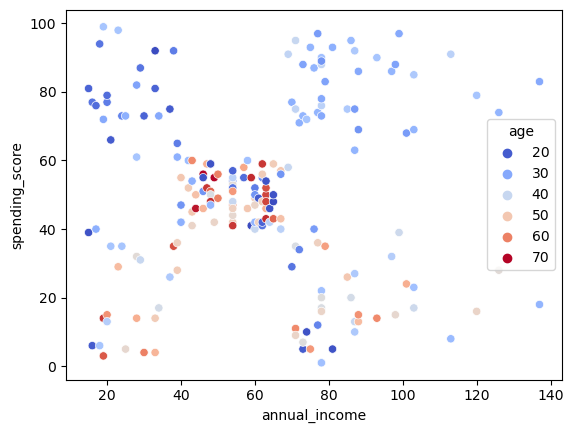

In [509]:
sns.scatterplot(x='annual_income', y='spending_score',hue='age', data=mall_df, palette='coolwarm')

> Looks like there is something happening when annual_income is between 40 & 60. Maybe 4 income categories would be appropriate? [0-40), [40-70), [70+)

### Create Feature Space

In [510]:
# for age (below 40, above 40)
mall_df['under_40'] = pd.cut(mall_df.age,[0,40,80], labels=[1, 0])

In [511]:
# for annual income
mall_df['income_bins'] = pd.cut(mall_df.annual_income,[0,20,40,137], labels=[1,2,3])

In [512]:
mall_df.sample(10)

,customer_id,gender,age,annual_income,spending_score,under_40,income_bins
135,136,Female,29,73,88,1,3
196,197,Female,45,126,28,0,3
149,150,Male,34,78,90,1,3
72,73,Female,60,50,49,0,3
40,41,Female,65,38,35,0,2
142,143,Female,28,76,40,1,3
33,34,Male,18,33,92,1,2
195,196,Female,35,120,79,1,3
82,83,Male,67,54,41,0,3
143,144,Female,32,76,87,1,3


In [513]:
# create feature space

#initial model
mall_df_gender_encoded = mall_df_original.replace({'Female': 1, 'Male' : 0})
X = mall_df_gender_encoded.drop(columns=['spending_score', 'customer_id'])

# model 2 using binned age and income
X2 = mall_df[['under_40','income_bins', 'spending_score']]

In [514]:
#
## model 2 using binned age and
#dummy_df = pd.get_dummies(mall_df[['income_bins']], drop_first=False)
#mall_df = pd.concat([mall_df, dummy_df], axis=1)
#X2 = mall_df[['under_40', 'income_bins_(0, 20]',
#       'income_bins_(20, 40]', 'income_bins_(40, 137]']]

In [515]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score,under_40,income_bins
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1


#### Use elbow method to choose k (Initial Model)

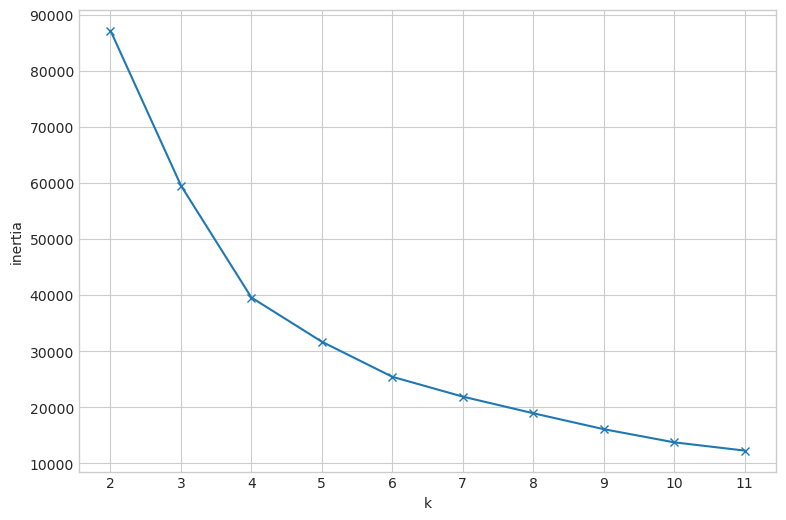

In [516]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')

> Our Initial model used 'gender', 'age', and 'annual_income'.
> Elbow method suggests clusters of 3 or 4

#### Use elbow method to choose k (Model 2 Features)

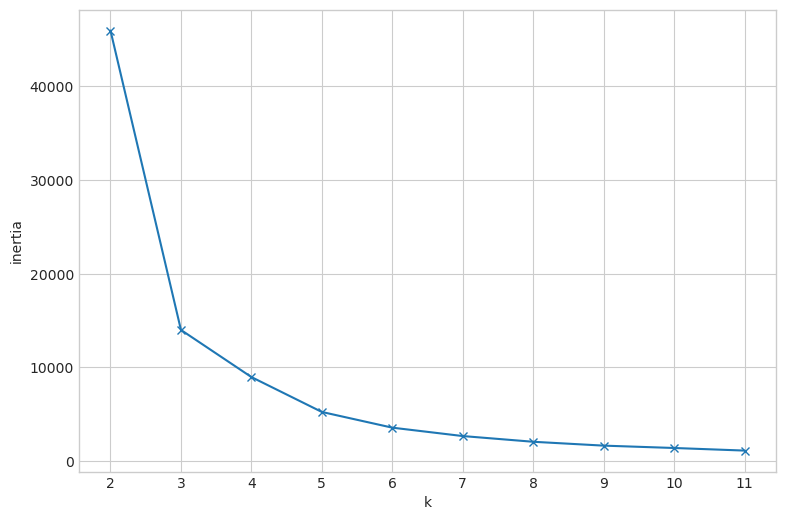

In [517]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')

> Model 2 used binned values for age and income. Elbow method suggests 4 or 5 clusters.

In [518]:
mall_df

,customer_id,gender,age,annual_income,spending_score,under_40,income_bins
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,1,3
198,199,Male,32,137,18,1,3


##### Model 1

In [519]:
# create kmeans object
model1 = KMeans(n_clusters=4)

# fit
model1.fit(X)

# predict
predict_1 = model1.predict(X)

# add predictions to df
mall_df['model1_cluster_predict'] = predict_1

##### Model 2

In [520]:
# create kmeans object
model2 = KMeans(n_clusters=3)

# fit
model2.fit(X2)

# predict
predict_2 = model2.predict(X2)

# add predictions to df
mall_df['model2_cluster_predict']  = predict_2

<Axes: xlabel='annual_income', ylabel='spending_score'>

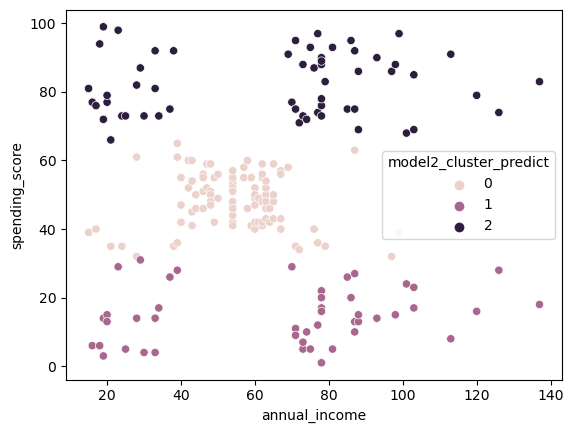

In [526]:
sns.scatterplot(data=mall_df, x='annual_income', y='spending_score', hue='model2_cluster_predict')

In [522]:
mall_df.head(10)

,customer_id,gender,age,annual_income,spending_score,under_40,income_bins,model1_cluster_predict,model2_cluster_predict
0,1,Male,19,15,39,1,1,1,0
1,2,Male,21,15,81,1,1,1,2
2,3,Female,20,16,6,1,1,1,1
3,4,Female,23,16,77,1,1,1,2
4,5,Female,31,17,40,1,1,1,0
5,6,Female,22,17,76,1,1,1,2
6,7,Female,35,18,6,1,1,1,1
7,8,Female,23,18,94,1,1,1,2
8,9,Male,64,19,3,0,1,2,1
9,10,Female,30,19,72,1,1,1,2


## 3. How does scaling impact the results of clustering?

sns